# L2-A - Linear Quantization I: Quantize and De-quantize a Tensor

In this lesson, you will learn the fundamentals of linear quantization.

In [1]:
import torch

## Quantization with Random `Scale` and `Zero Point`

- Implement Linear Quantization for when the "scale" and the "zero point" are known/randomly selected.

In [2]:
def linear_q_with_scale_and_zero_point(tensor, scale, zero_point, dtype=torch.int8):
    scaled_and_shifted_tensor = tensor/scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(min=q_min, max=q_max).to(dtype=dtype)

    return q_tensor

In [3]:
### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [4]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 3.5
zero_point = -70

In [5]:
quantized_tensor = linear_q_with_scale_and_zero_point(tensor=test_tensor, scale=scale, zero_point=zero_point)

In [6]:
quantized_tensor

tensor([[ -15,  -74,  127],
        [ -44,   14, -123],
        [ -70,  126,    0]], dtype=torch.int8)

## Dequantization with Random `Scale` and `Zero Point`

- Now, Dequantize the tensor to see how precise the quantization is.

In [7]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [8]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

Let's check what would happen without casting quantized tensor to float

In [9]:
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000, -206.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000, -210.0000,  245.0000]])

### Quantization Error

- Load the `plot_quantization_errors` from the helper file.

In [10]:
from helper import plot_quantization_errors

- Plot the quantization results

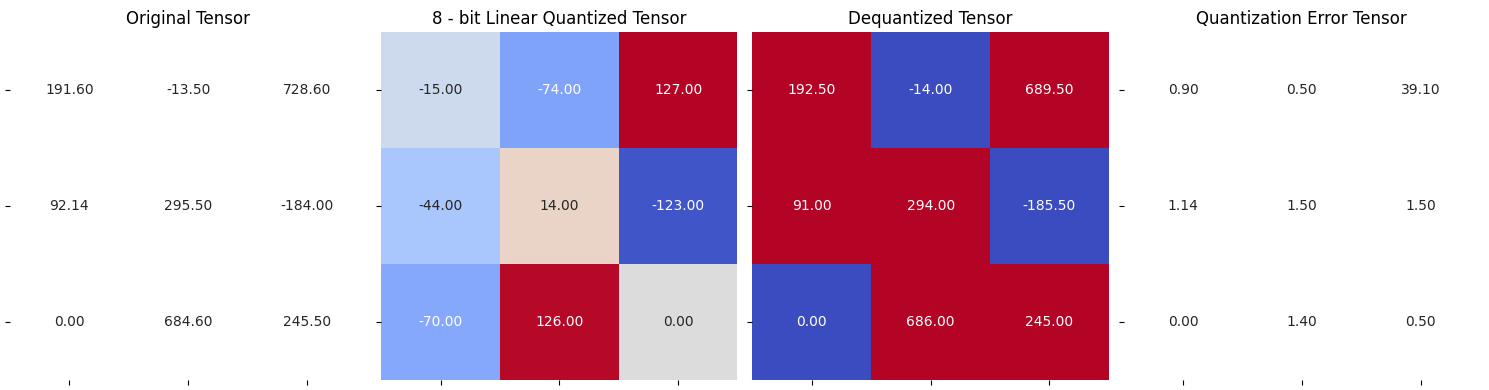

In [11]:
plot_quantization_errors(original_tensor=test_tensor, quantized_tensor=quantized_tensor, dequantized_tensor=dequantized_tensor)

**Note:** For the plot above, `Quantization Error Tensor = abs(Original Tensor - Dequantized Tensor)`

- Calculate an "overall" quantization error by using [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) technique.

In [12]:
dequantized_tensor - test_tensor

tensor([[  0.9000,  -0.5000, -39.1000],
        [ -1.1400,  -1.5000,  -1.5000],
        [  0.0000,   1.4000,  -0.5000]])

In [13]:
(dequantized_tensor - test_tensor).square()

tensor([[8.0999e-01, 2.5000e-01, 1.5288e+03],
        [1.2996e+00, 2.2500e+00, 2.2500e+00],
        [0.0000e+00, 1.9601e+00, 2.5000e-01]])

In [14]:
(dequantized_tensor - test_tensor).square().mean()

tensor(170.8753)